<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº3: Análisis de Fourier
#### Mora Taranilla

## Introducción
La *transformada de Fourier* es una herramienta muy frecuente en el campo del procesamiento de señales. Se utiliza para el estudio de las señales en el dominio de la frecuencia, obteniendo más información que en el dominio temporal. La transformada para señales discretas, de *N* muestras se define como:

$$
F\{x[n]\} = X[k] = \sum_{n = -\infty}^{\infty} x[n] \cdot e^{-j \frac{2\pi \cdot n \cdot k}{N}}
$$

Cuando tenemos una señal en tiempo de  N muestras, de manera implicita, se está multiplicando a la misma por una ventana rectangular que vale $w[0:N-1] = 1$ y cero en los demás valores. Al transformar la señal, obtenemos la convolución entre la señal transformada y la ventana transformada. Uno de los resultados que más nos interesa en este caso, es la transformada de Fourier de una senoidal. Si tenemos una función $sin(\omega_0 \cdot t)$, su transformada es una delta de Dirac trasladada a $\omega_0$. Por otro lado, la transformada de una ventana rectangular es una función $sinc$.

$$
W[k] = e^{-j \frac{\pi k (n_0-1)}{N}} \cdot n_0 \cdot \frac{sinc(\frac{\pi n_0 k}{N})}{sinc(\frac{\pi k}{N})}
$$

Siendo $n_0$ la longitud de la señal y N la longitud de la ventana.

¿Cómo se refleja esto en la convolución de ambas señales? Al tener una delta trasladada, su convolución con cualquier señal, se traduce como el desplazamiento de la misma señal a la ubicación de la delta. Es por ello que se obtiene un sinc trasladado, que vale 1 en donde se ubica la delta, y cero para cada $\omega_0 \pm k \cdot \Delta f$. 

La ventana no genera conflicto, a menos que se utilice una frecuencia para la senoidal que no es múltiplo entero de $\Delta f$, en ese caso se genera *desparramo espectral*. El desparramo espectral se traduce como el desparramo de energía a lo largo de la totalidad del ancho de banda. De esta manera, en los gráficos ya no se visualiza una delta y se puede ver la función $sinc$.

Otro concepto relevante para el desarrollo de este trabajo es la densidad espectral de potencia (*PSD*) de una señal. La misma se define como la transformada de Fourier de la autocorrelación, es decir: 

$$
S_{xx} = \sum_{n = - \infty}^{\infty} r_{xx}[n] \cdot e^{-j \cdot \omega \cdot n}
$$

Un gráfico PSD nos da información sobre la distribución de la potencia de una señal a distintas frecuencias, lo que permite saber en cuales de ellas se concentra más la energía.

## Análisis y Desarrollo
Para ver los efectos de la transformada de Fourier y el desparramo espectral, en un principio utilizamos tres señales senoidales que cumplen:
- frecuencia de la senoidal: $f = k_0 \cdot \Delta f = k_0 \cdot \frac{fs}{N}$
- potencia normalizada, es decir una varianza igual a cero.

Con valores de $k_0$:
- $\frac{N}{4}$
- $\frac{N}{4} + 0.25$
- $\frac{N}{4} + 0.5$

Para todos los casos, se utilizaron $N = 1000$ muestras y $fs = 1000 Hz$. Para observar la densidad espectral de potencia: se calculó la FFT de las señales y el módulo de los resultados se los elevó al cuadrado y dividió por la cantidad de muestras.

La varianza de la primera senoidal es 1.0000
La varianza de la segunda senoidal es 0.9990
La varianza de la tercera senoidal es 1.0000


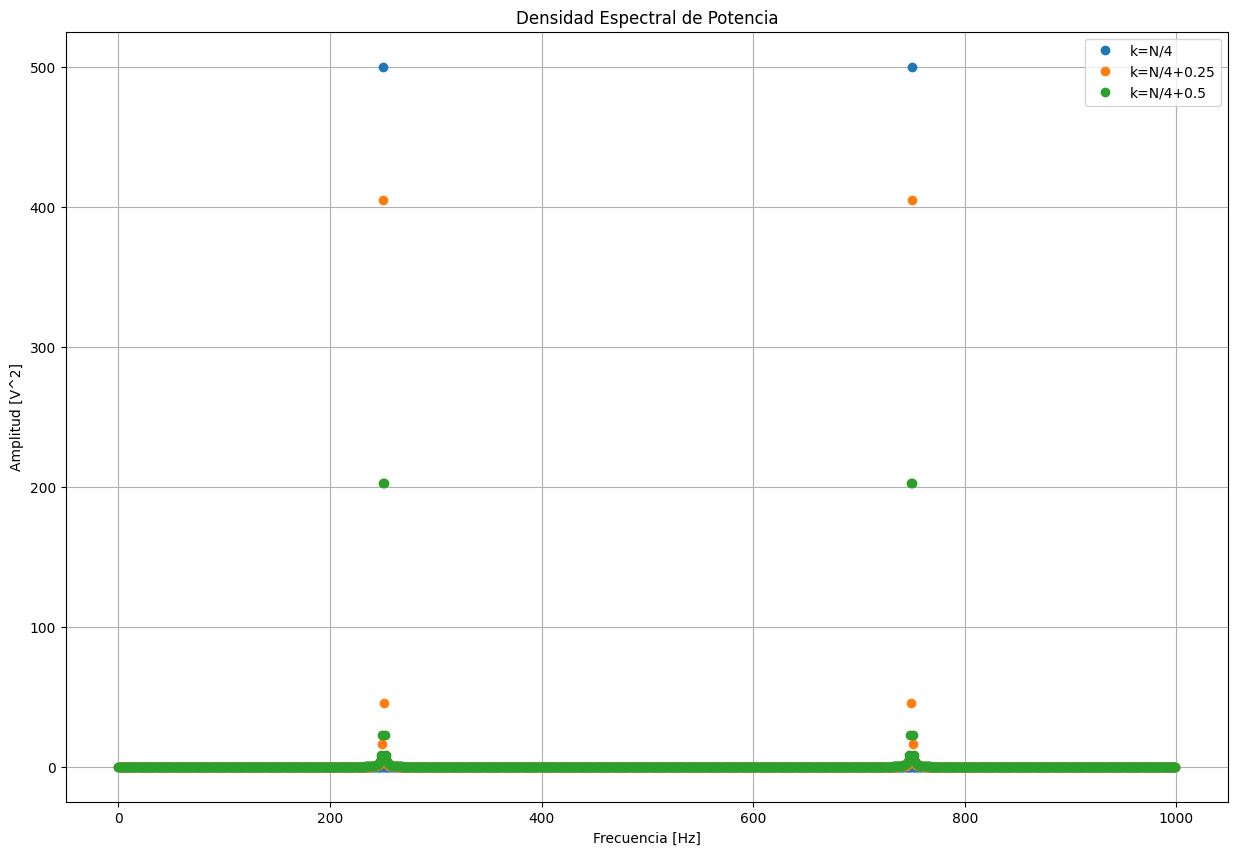

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Planteo mi senoidal
N = 1000
fs = 1000 #Hz

def mi_funcion_sen(ff, nn, amp = 1, dc = 0, ph = 0, fs = 2): 
    Ts = 1/fs #tiempo de muestreo
    T_simulacion = nn * Ts # segundos
    
    tt = np.arange(start=0, stop=T_simulacion, step = Ts) #grilla temporal
    xx = amp * np.sin( 2 * np.pi * ff * tt + ph ) + dc
    
    return tt, xx

k_0 = N/4
k_1 = N/4 + 0.25
k_2 = N/4 + 0.5
 
## Genero mis senoidales, todas con tt, ya que tienen la misma grilla temporal
tt, x_0 = mi_funcion_sen(ff = k_0 * fs/N, nn = N, amp = np.sqrt(2), fs = fs)
tt, x_1 = mi_funcion_sen(ff = k_1 * fs/N, nn = N, amp = np.sqrt(2), fs = fs)
tt, x_2 = mi_funcion_sen(ff = k_2 * fs/N, nn = N, amp = np.sqrt(2), fs = fs)

potx0 = np.var(x_0) #Para verificar la potencia unitaria
potx1 = np.var(x_1)
potx2 = np.var(x_2)

print(f'La varianza de la primera senoidal es {potx0:.4f}')
print(f'La varianza de la segunda senoidal es {potx1:.4f}')
print(f'La varianza de la tercera senoidal es {potx2:.4f}')

## Transformo Fourier
bins = np.arange(N) * fs/N #Devuelve el eje de frecuencia

X_0 = np.fft.fft(x_0)
X_1 = np.fft.fft(x_1)
X_2 = np.fft.fft(x_2)

# Gráficos de PSD
plt.figure(1, figsize=(15,10))
plt.plot(bins, (np.abs(X_0)**2)/(N), 'o',label='k=N/4')
plt.plot(bins, (np.abs(X_1)**2)/(N), 'o',label='k=N/4+0.25')
plt.plot(bins, (np.abs(X_2)**2)/(N), 'o',label='k=N/4+0.5')
plt.title('Densidad Espectral de Potencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [V^2]')
plt.legend()
plt.grid(True)
plt.show()

En un primer lugar, se puede observar que se generó de manera adecuada la señal de varianza unitaria. 
En rasgos generales se pueden observar comportamientos esperados, como por ejemplo que se refleje la respuesta a la mitad de la frecuencia de muestreo (Nyquist). Se puede observar algo similar a dos deltas trasladadas a las frecuencias de las senoidales ($\sim 250Hz$). Para mayor comodidad a la hora de hacer el análisis, grafico los valores entre 200 y 300 Hz.

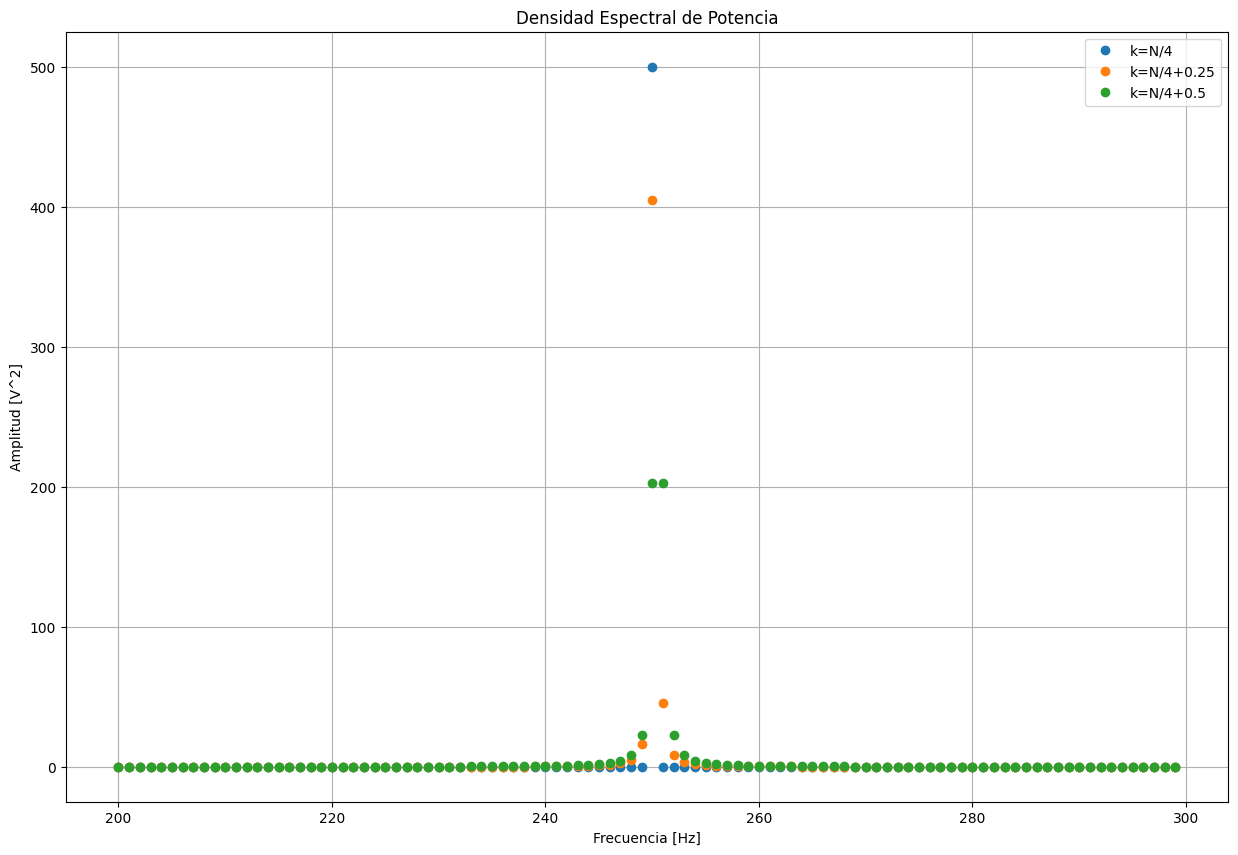

In [4]:
plt.figure(2, figsize=(15,10))
plt.plot(bins[200:300], ((np.abs(X_0)**2)/(N))[200:300], 'o',label='k=N/4')
plt.plot(bins[200:300], ((np.abs(X_1)**2)/(N))[200:300], 'o',label='k=N/4+0.25')
plt.plot(bins[200:300], ((np.abs(X_2)**2)/(N))[200:300], 'o',label='k=N/4+0.5')
plt.title('Densidad Espectral de Potencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [V^2]')
plt.legend()
plt.grid(True)
plt.show()


En este nuevo gráfico, se puede observar claramente que la única delta marcada es el caso de la primer frecuencia, es decir con $k_0 = \frac{N}{4} = 250$. En este caso llega a un valor de $500 V^2$, esto es porque la energía se define como $E(x[n]) = \sum{n=0}^{N-1} |x[n]|^2 = N \cdot Var(x[n])$. Para estas señales, como su transformada son dos deltas, la energía se divide entre ambas de igual manera, generando dos picos de $500 V^2$.

Por otro lado, se puede ver que el comportamiento para las otras dos frecuencias es distinto. Esto sucede cuando la frecuencia no es un múltiplo entero de $\Delta f$. Tal como fue introducido anteriormente, se produce el desparramo espectral, y la energía antes concentrada en los deltas se desparrama hacia todo el ancho de banda. Como la $\delta$ de la senoidal se ubica en un punto donde no se realiza muestreo, se observan valores de la función $sinc$ que genera la ventana rectangular. De igual manera, en los tres casos se cumple que la energía total es de $1000 V^2$, solo que no se concentra en las deltas.

En caso de la tercer frecuencia, se puede observar una especie de simetría en el espectro, ya que justo se ubica en medio de dos muestras la delta y la función sinc es una función par. Esta simetría se respeta para todas las señales, en caso de la segunda frecuencia es más dificil de visualizar, ya que no hay una misma distancia desde la delta hacia la primer muestra de cada lado.

### Verificación de la potencia unitaria
Ya pudimos verificar que las señales generadas eran de potencia unitaria, pero también se puede realizar mediante la identidad de Parseval. La identidad de Parseval nos dice que:

$$
\sum_{n=0}^{N-1} |x[n]|^2 = \frac{1}{N} \sum_{k=0}^{N-1} |X[k]|^2
$$

Donde:
- $x[n]$ es la señal en dominio temporal
- $X[k]$ es la señal en dominio de frecuencias
- $N$ es la cantidad de muestras

Si dividimos ambos lados del igual por la cantidad de muestras, obtenemos la potencia. Para realizarlo, en un principio verifiqué la igualdad para una señal, y luego la utilicé para calcular la potencia de todas ellas.

In [5]:
# Lado A
sumaA = 0

for k in range(N):
    sumaA += np.abs(x_0[k])**2

# Lado B
sumaB = 0

for k in range(N):
    sumaB += np.abs(X_0[k])**2

sumaB = sumaB/N

print(f'{sumaA}')
print(f'{sumaB}')

1000.0000000000001
1000.0000000000001


Podemos observar gracias a los resultados obtenidos que si se cumple la igualdad. Por ello es que ahora puedo realiza el cálculo de la potencia para todas las señales mediante esta fórmula: $P(x[n]) = \frac{1}{N^2} \sum_{k=0}^{N-1} |X[k]|^2$

In [6]:
def ladoB_Parseval(xx):
    N = len(xx)
    XX = np.fft.fft(xx)
    suma = 0
    tot = 0
    
    for k in range(N):
        suma += np.abs(XX[k])**2
    
    tot = suma/N
    return tot

pot_unitaria_x0 = ladoB_Parseval(x_0)/N
pot_unitaria_x1 = ladoB_Parseval(x_1)/N
pot_unitaria_x2 = ladoB_Parseval(x_2)/N

print(f'La potencia de la primera senoidal es de {pot_unitaria_x0:.4} W')
print(f'La potencia de la segunda senoidal es de {pot_unitaria_x1:.4} W')
print(f'La potencia de la tercera senoidal es de {pot_unitaria_x2:.4} W')

La potencia de la primera senoidal es de 1.0 W
La potencia de la segunda senoidal es de 0.999 W
La potencia de la tercera senoidal es de 1.0 W


Estos son los valores esperados, ya que son iguales a los que fueron calculados anteriormente con la varianza. 

### Zero Padding
El zero padding es una técnica para aumentar la resolución espectral de la señal. Utilizaremos la misma para observar mejor la función $sinc$ que se genera al transformar la ventana rectangular. Esta técnica consiste en agregar una gran cantidad de ceros al final de la señal, para obtener una ventana más grande, ¿cómo es que esto afecta a la resolución espectral?

Si volvemos a la definición de la transformada de la ventana rectangular tenemos: 

$$
W[k] = e^{-j \frac{\pi k (n_0-1)}{N}} \cdot n_0 \cdot \frac{sinc(\frac{\pi n_0 k}{N})}{sinc(\frac{\pi k}{N})}
$$

Si realizamos el zero padding obtenemos una nueva señal, agregando 9N zeros al final, obtenemos:
$$
x[n] =
\begin{cases}
A_0 \cdot sin(k_0 \cdot 2\pi \cdot t) \text{ si } n \in [0,N-1] \\
0 \text{ si } n \in [N,10N-1]
\end{cases}
$$

Obtenemos de esta forma la siguiente representación del módulo de $W[k]$:
$$
|W[k]| = N \cdot \frac{sinc(\frac{\pi k}{10})}{sinc(\frac{\pi k}{10\cdot N})} 
$$

De esta manera, mis ceros son cada $10k$, aumentando la resolución por 10. De esta manera, obtenemos más valores en medio y se puede visualizar el módulo de la función sinc. Vamos a tener un nuevo $\Delta f_{padding} = fs/10N = 1/10 Hz$

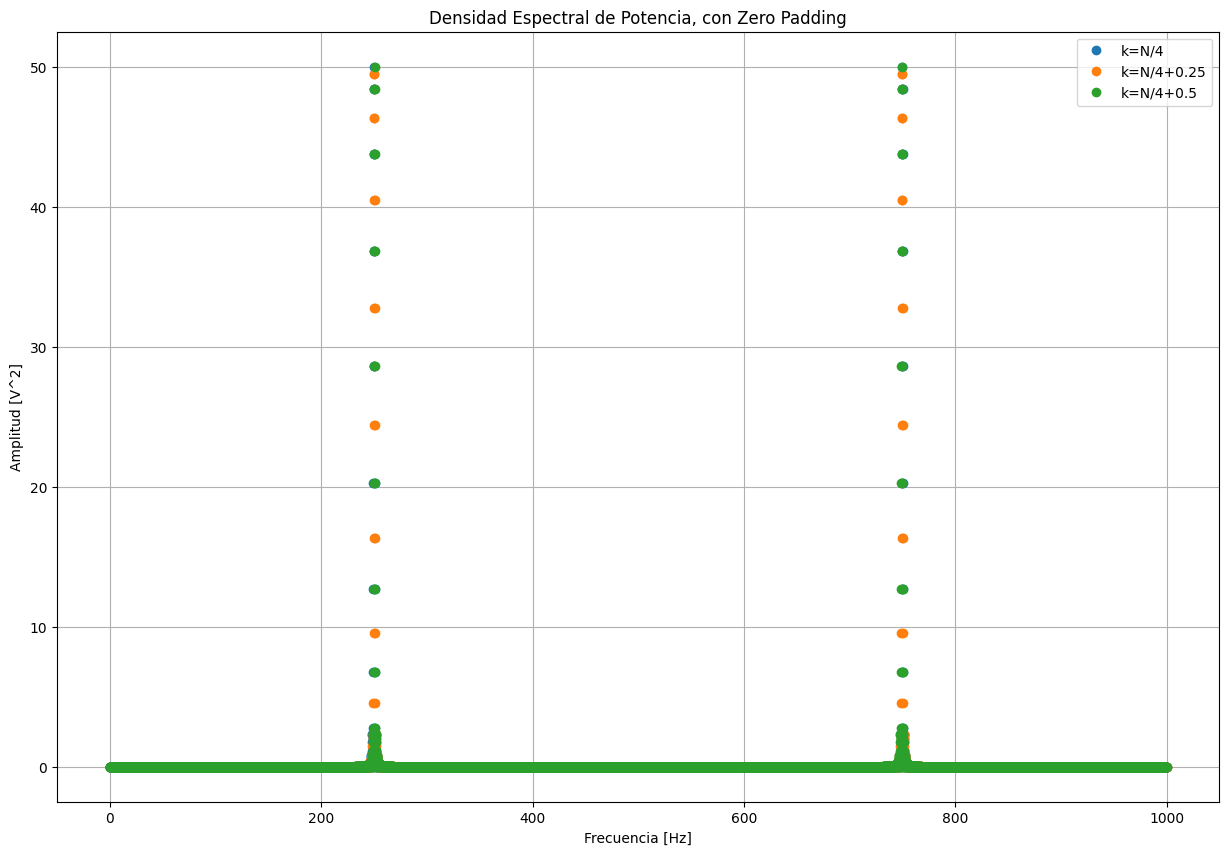

In [9]:
def padding(xx, mult = 10):
    n = len(xx)
    xpad = np.zeros(mult*n)
    
    xpad[:n] = xx
    
    return xpad

eje_padd = np.arange(10*N) *1/fs

x_0_padd = padding(x_0)
x_1_padd = padding(x_1)
x_2_padd = padding(x_2)

## Transformo con Zero Padding
X_0_PADD = np.fft.fft(x_0_padd)
X_1_PADD = np.fft.fft(x_1_padd)
X_2_PADD = np.fft.fft(x_2_padd)

bins_padd = np.arange(10*N) * fs/(10*N)

plt.figure(3, figsize=(15,10))
plt.plot(bins_padd, (np.abs(X_0_PADD)**2)/(10*N), 'o',label='k=N/4')
plt.plot(bins_padd, (np.abs(X_1_PADD)**2)/(10*N), 'o',label='k=N/4+0.25')
plt.plot(bins_padd, (np.abs(X_2_PADD)**2)/(10*N), 'o',label='k=N/4+0.5')
plt.title('Densidad Espectral de Potencia, con Zero Padding')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [V^2]')
plt.legend()
plt.grid(True)
plt.show()

Podemos observar que se sigue manteniendo correctamente la ubicación de la delta, pero al tener más resolución es más complicado observar cada valor que toma la transformada. También se puede observar que el pico de las primera delta no es de $500 V^2$, y es porque la cantidad total de muestras en este caso es 10 veces mayor, y la energía se distribuye entre los 10 bins. Lo que se cumple para este tipo de gráficos, es que la sumatoria de los valores (integral) es igual a la energía de la señal.

Nuevamente, para poder analizar mejor los resultados, grafico unicamente un intervalo donde se encuentren las deltas. 

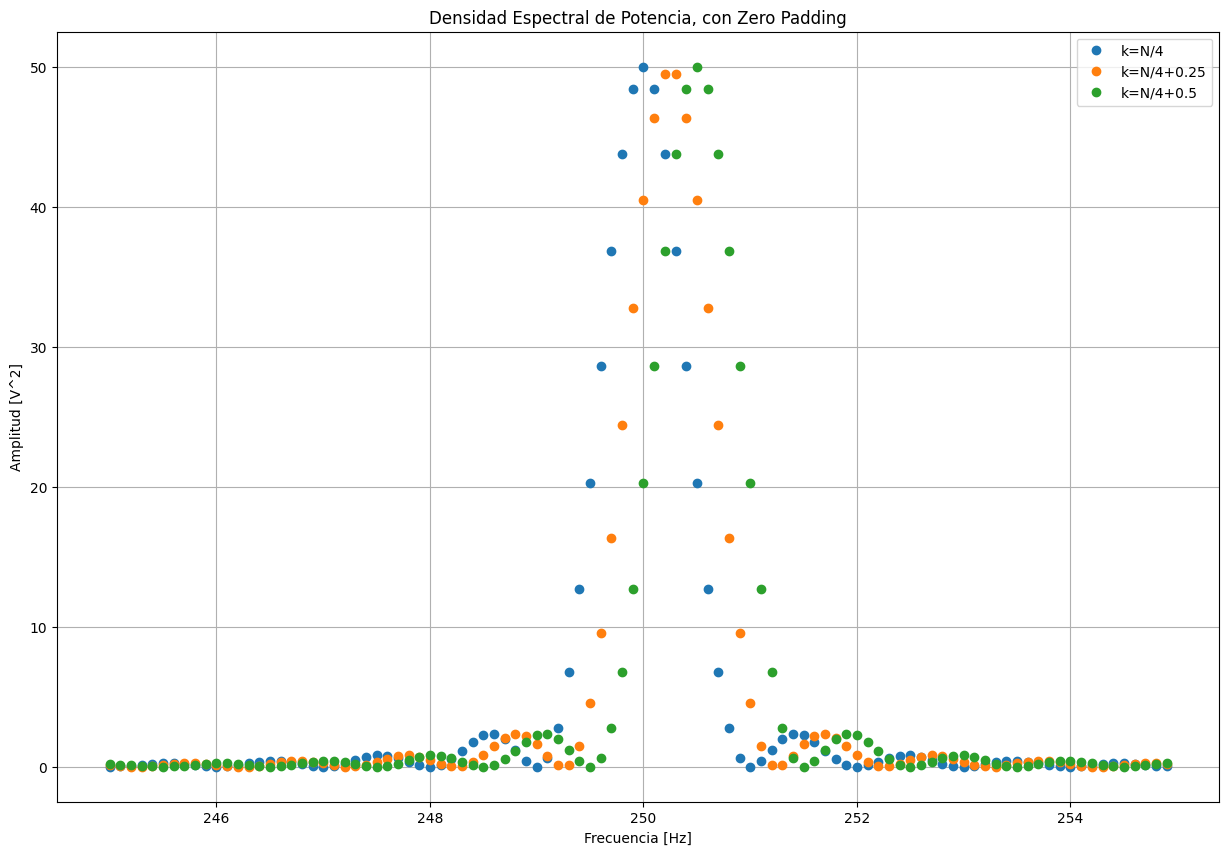

In [13]:
plt.figure(4, figsize=(15,10))
plt.plot(bins_padd[2450:2550], ((np.abs(X_0_PADD)**2)/(10*N))[2450:2550], 'o',label='k=N/4')
plt.plot(bins_padd[2450:2550], ((np.abs(X_1_PADD)**2)/(10*N))[2450:2550], 'o',label='k=N/4+0.25')
plt.plot(bins_padd[2450:2550], ((np.abs(X_2_PADD)**2)/(10*N))[2450:2550], 'o',label='k=N/4+0.5')
plt.title('Densidad Espectral de Potencia, con Zero Padding')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [V^2]')
plt.legend()
plt.grid(True)
plt.show()

En base a esta nueva representación, se pueden observar las funciones $sinc$ que resultan de la transformada de la señal, en sus valores módulo. Como en caso de la segunda frecuencia, sigue sin tener la delta en un valor medio entre bins, no llega al valor de 50, pero ahora si se refleja esa simetría que se observaba sin el zero padding para la tercera frecuencia. 

También es interesante observar dónde se ubican los ceros de la función $sinc$ que resulta de la primera frecuencia. Se observa que sus valores son cero en desplazamientos enteros de $250 Hz \pm k \cdot 1Hz = 250 Hz \pm k \cdot \Delta f_{inicial}$. Esto se podía visualizar directamente en el primer gráfico. Por otro lado, las otras funciones $sinc$ al estar desplazadas, sus ceros también se desplazan.

Gracias a esta nueva representación con zero padding, se puede observar de manera práctica cómo funciona la transformada de Fourier y el efecto de la ventana rectangular implícita.

### Bonus
Para este apartado, se solicitaba encontrar la respuesta en frecuencia de los sistemas LTI presentados en la tarea anterior. Para llevarlo a cabo, se debe transformar Fourier la respuesta al impulso. 

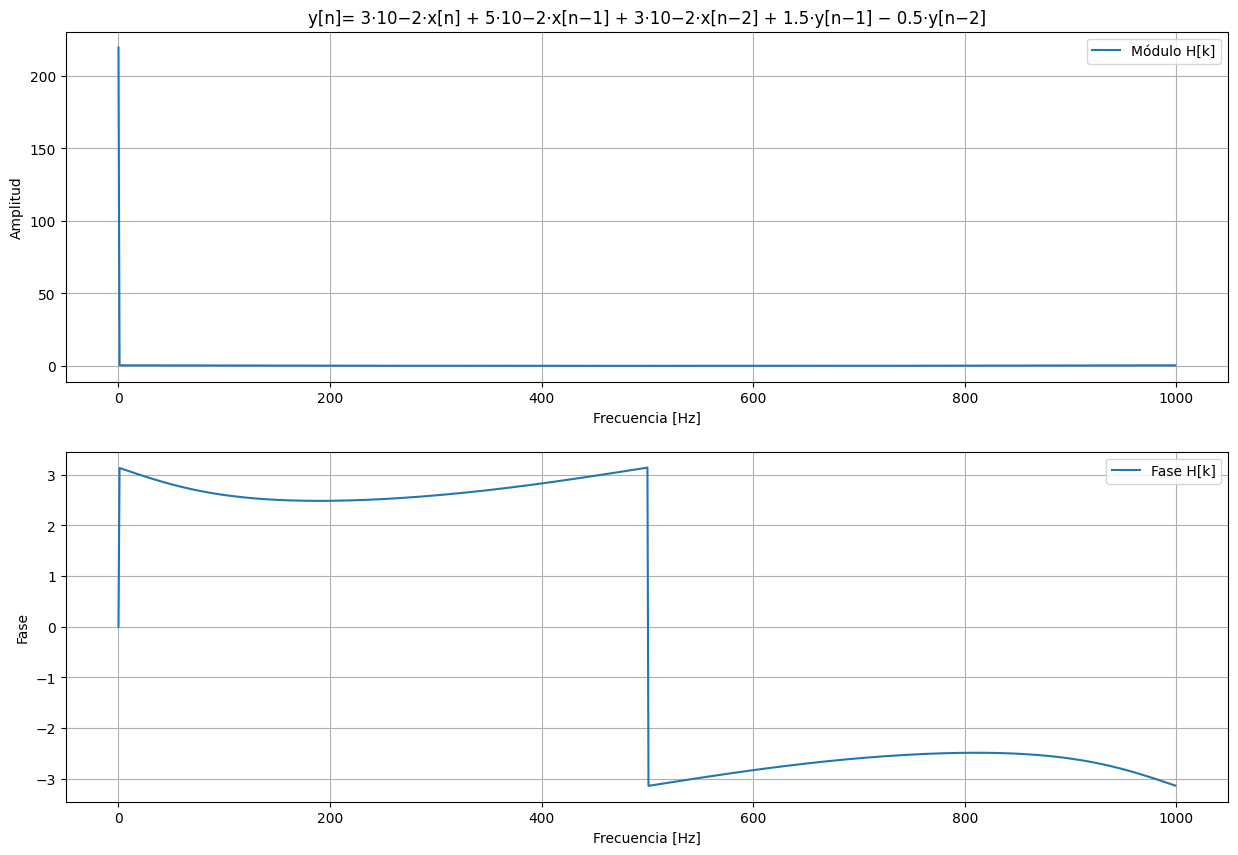

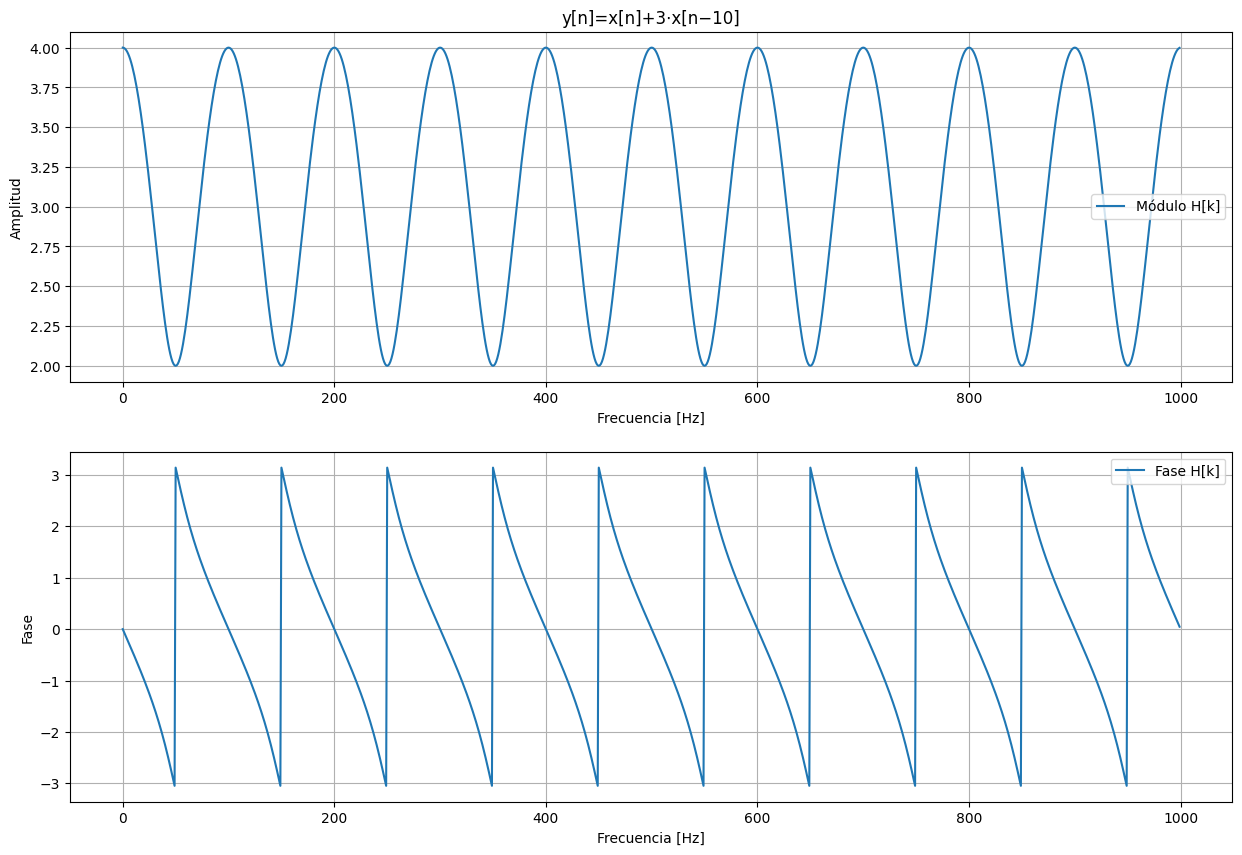

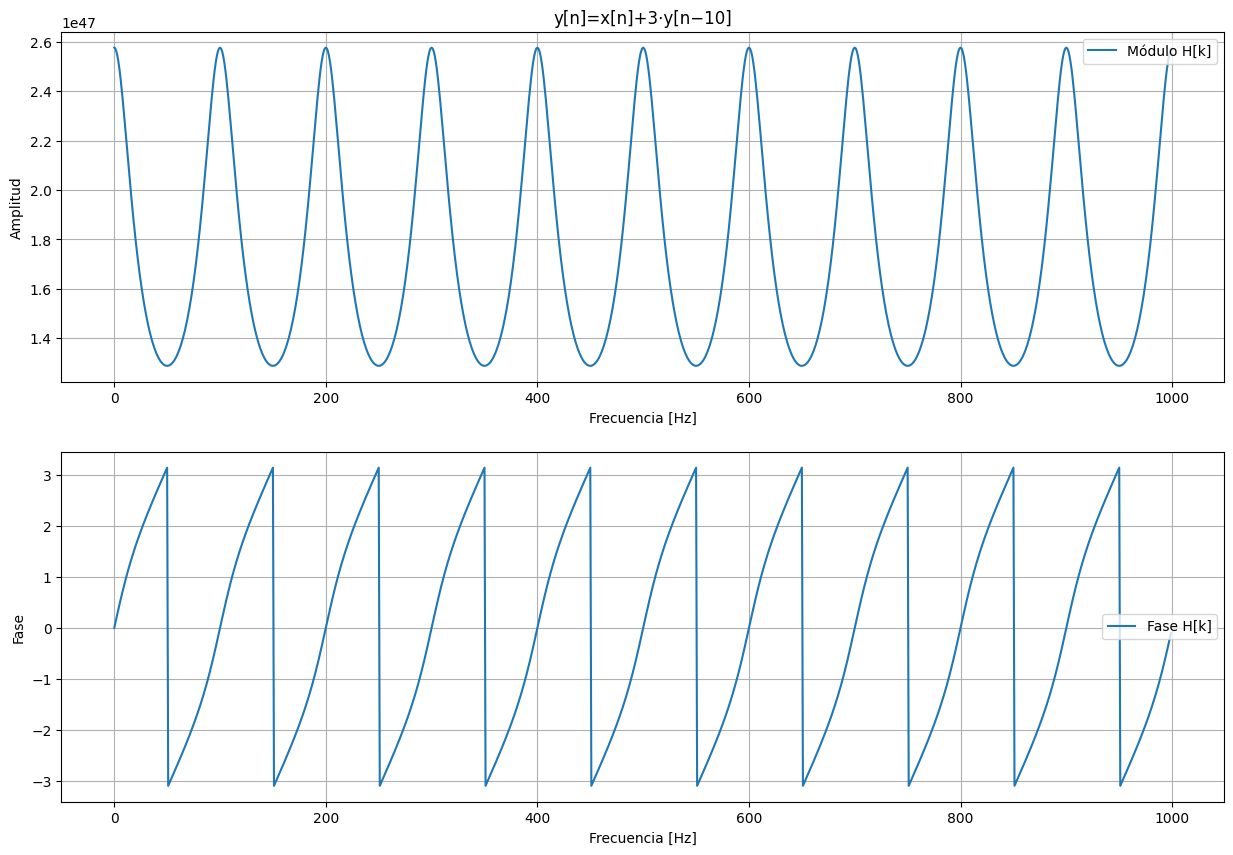

In [14]:
def ec_diferencias (xx, aa, bb):
    nn = len(bb)
    mm = len(aa)
    Y = np.zeros(len(xx))
    
    for n in range (len(xx)):
        y_x = 0 #Inicializo las sumas para cada n
        y_y = 0
        for k in range(nn):
            if n-k >= 0: 
                y_x += bb[k] * xx[n-k]
        for k in range(mm):
            if n-k-1 >= 0:
                y_y += aa[k] * Y[n-1-k]
        
        Y[n] = y_x + y_y
        
    return Y

def delta(nn, k = 0):
    d = np.zeros(nn)
    d[k] = 1
    
    return d

imp = delta(N)

# y[n]= 3⋅10−2⋅x[n] + 5⋅10−2⋅x[n−1] + 3⋅10−2⋅x[n−2] + 1.5⋅y[n−1] − 0.5⋅y[n−2]
aa = [1.5, -0.5]
bb = [3*(10**-2), 5*(10**-2), 3*(10**-2)]

h1 = ec_diferencias(imp,aa,bb) #Respuesta al impulso

# y[n]=x[n]+3⋅x[n−10]
a2i = [0]
b2i = [1,0,0,0,0,0,0,0,0,0,3]

h2i = ec_diferencias(imp,a2i,b2i) #Rta al Impulso

# y[n]=x[n]+3⋅y[n−10]
a2ii = [0,0,0,0,0,0,0,0,0,3]
b2ii = [1]

h2ii = ec_diferencias(imp,a2ii,b2ii) #Rta al Impulso

## Para calcular la respuesta en frecuencia, transformo Fourier las respuestas al impulso
H1 = np.fft.fft(h1)
H2 = np.fft.fft(h2i)
H3 = np.fft.fft(h2ii)

plt.figure(5, figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(bins, np.abs(H1), label='Módulo H[k]')
plt.title('y[n]= 3⋅10−2⋅x[n] + 5⋅10−2⋅x[n−1] + 3⋅10−2⋅x[n−2] + 1.5⋅y[n−1] − 0.5⋅y[n−2]')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.subplot(2,1,2)
plt.plot(bins, np.angle(H1), label='Fase H[k]')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase')
plt.grid(True)
plt.legend()

plt.show()

plt.figure(6, figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(bins, np.abs(H2), label='Módulo H[k]')
plt.title('y[n]=x[n]+3⋅x[n−10]')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.subplot(2,1,2)
plt.plot(bins, np.angle(H2), label='Fase H[k]')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase')
plt.grid(True)
plt.legend()

plt.show()

plt.figure(7, figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(bins, np.abs(H3), label='Módulo H[k]')
plt.title('y[n]=x[n]+3⋅y[n−10]')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.subplot(2,1,2)
plt.plot(bins, np.angle(H3), label='Fase H[k]')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase')
plt.grid(True)
plt.legend()

plt.show()

## Conclusiones
En conclusión, este trabajo permitió profundizar en el análisis de la Transformada Discreta de Fourier (DFT) y el fenómeno del desparramo espectral (*spectral leakage*). 

En primera instancia, al aplicar la DFT a senoidales de distintas frecuencias, observamos que no siempre se obtiene un pico tipo delta concentrando la energía, como se espera en teoría para frecuencias perfectamente alineadas con los bins de la DFT. Este desvío se debe al fenómeno de *leakage*, el cual aparece cuando la frecuencia de la señal no es un múltiplo entero de la resolución espectral $\Delta f$. En estos casos, la DFT no mide solo una frecuencia puntual, sino una muestra de la transformada de la ventana rectangular utilizada, es decir, una función tipo $sinc$.

Este comportamiento fue aún más evidente al aplicar la técnica de *zero padding*, que permite incrementar la resolución espectral de forma ficticia. Al interpolar entre los bins originales, pudimos observar con mayor claridad la envolvente de la función $sinc$, evidenciando cómo la energía se distribuye entre varios bins cuando la señal no está perfectamente sintonizada.

En particular, para las frecuencias 2 y 3 (con desintonías de 0.25 y 0.5 bins), se pudo ver que la función $\text{sinc}$ está desplazada respecto al centro del espectro, pero mantiene la estructura de ceros a múltiplos de $\Delta f$, mostrando que el desparramo conserva ciertas propiedades de simetría y periodicidad.

Estos resultados confirman la importancia de la sintonía entre la frecuencia de la señal y los bins de la DFT, y muestran cómo la elección de ventana y la longitud de la señal influyen directamente en la representación espectral obtenida.

## Autoevaluación
Llevar a cabo esta tarea me resultó fundamental para terminar de comprender los conceptos de desparramo espectral y zero padding. Aunque fueron realizados durante la clase, algunos conceptos no los había logrado procesar por completo. Para realizar la parte de códigos, no utilicé la IA. Por otro lado, si la utilicé para consultar algunos conceptos teóricos. 